<a href="https://colab.research.google.com/github/Adrianus-Bagas/Heart_Disease_Prediction/blob/main/Heart_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediksi Penyakit Jantung Menggunakan CNN

## 1. Import beberapa libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense,Conv1D,MaxPool1D,BatchNormalization,Dropout
from tensorflow.keras.optimizers import Adam

# 2. Load dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/dataset/heart_2020_cleaned.csv')
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


# 3. Preprocessing

In [ ]:
df.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [ ]:
df['AgeCategory'].unique()

array(['55-59', '80 or older', '65-69', '75-79', '40-44', '70-74',
       '60-64', '50-54', '45-49', '18-24', '35-39', '30-34', '25-29'],
      dtype=object)

In [ ]:
umur = {'55-59':57, '80 or older':80, 
        '65-69':67, '75-79':77,
        '40-44':42,'70-74':72,
        '60-64':62, '50-54':52,
        '45-49':47,'18-24':21,
        '35-39':37, '30-34':32,'25-29':27}
df['AgeCategory'] = df['AgeCategory'].apply(lambda x: umur[x])
df['AgeCategory'] = df['AgeCategory'].astype('float')
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,57.0,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80.0,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,67.0,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,77.0,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,42.0,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,62.0,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,37.0,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,47.0,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,27.0,Hispanic,No,No,Good,12.0,No,No,No


In [ ]:
for col in ['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'PhysicalActivity', 'Asthma', 'KidneyDisease', 'SkinCancer']:
    if df[col].dtype == 'O':
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
df = pd.get_dummies(df, columns=['Race', 'Diabetic', 'GenHealth', ], prefix = ['Race', 'Diabetic', 'GenHealth'])

In [ ]:
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,...,Race_White,Diabetic_No,"Diabetic_No, borderline diabetes",Diabetic_Yes,Diabetic_Yes (during pregnancy),GenHealth_Excellent,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good
0,0,16.60,1,0,0,3.0,30.0,0,0,57.0,...,1,0,0,1,0,0,0,0,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,80.0,...,1,1,0,0,0,0,0,0,0,1
2,0,26.58,1,0,0,20.0,30.0,0,1,67.0,...,1,0,0,1,0,0,1,0,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,77.0,...,1,1,0,0,0,0,0,1,0,0
4,0,23.71,0,0,0,28.0,0.0,1,0,42.0,...,1,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,27.41,1,0,0,7.0,0.0,1,1,62.0,...,0,0,0,1,0,0,1,0,0,0
319791,0,29.84,1,0,0,0.0,0.0,0,1,37.0,...,0,1,0,0,0,0,0,0,0,1
319792,0,24.24,0,0,0,0.0,0.0,0,0,47.0,...,0,1,0,0,0,0,0,1,0,0
319793,0,32.81,0,0,0,0.0,0.0,0,0,27.0,...,0,1,0,0,0,0,0,1,0,0


# 4. Model CNN

In [ ]:
X = df.drop('HeartDisease',axis=1)
Y = df['HeartDisease']

In [ ]:
X

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,PhysicalActivity,...,Race_White,Diabetic_No,"Diabetic_No, borderline diabetes",Diabetic_Yes,Diabetic_Yes (during pregnancy),GenHealth_Excellent,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good
0,16.60,1,0,0,3.0,30.0,0,0,57.0,1,...,1,0,0,1,0,0,0,0,0,1
1,20.34,0,0,1,0.0,0.0,0,0,80.0,1,...,1,1,0,0,0,0,0,0,0,1
2,26.58,1,0,0,20.0,30.0,0,1,67.0,1,...,1,0,0,1,0,0,1,0,0,0
3,24.21,0,0,0,0.0,0.0,0,0,77.0,0,...,1,1,0,0,0,0,0,1,0,0
4,23.71,0,0,0,28.0,0.0,1,0,42.0,1,...,1,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,27.41,1,0,0,7.0,0.0,1,1,62.0,0,...,0,0,0,1,0,0,1,0,0,0
319791,29.84,1,0,0,0.0,0.0,0,1,37.0,1,...,0,1,0,0,0,0,0,0,0,1
319792,24.24,0,0,0,0.0,0.0,0,0,47.0,1,...,0,1,0,0,0,0,0,1,0,0
319793,32.81,0,0,0,0.0,0.0,0,0,27.0,0,...,0,1,0,0,0,0,0,1,0,0


In [ ]:
Y

0         0
1         0
2         0
3         0
4         0
         ..
319790    1
319791    0
319792    0
319793    0
319794    0
Name: HeartDisease, Length: 319795, dtype: int64

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0,stratify=Y)

In [ ]:
X_train.shape

(255836, 29)

In [ ]:
X_test.shape

(63959, 29)

In [ ]:
X_train = np.array(X_train).reshape(255836,29,1)
X_test = np.array(X_test).reshape(63959,29,1)

In [ ]:
model=Sequential()
model.add(Conv1D(filters=32,kernel_size=2,activation='relu',input_shape=(29,1)))
model.add(BatchNormalization())
model.add(Dropout(0.2))


model.add(Conv1D(filters=64,kernel_size=2,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv1D(filters=128,kernel_size=2,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history=model.fit(X_train,Y_train,epochs=50,validation_data=(X_test,Y_test))

Epoch 1/50
7995/7995 [==============================] - 137s 17ms/step - loss: 0.2440 - accuracy: 0.9144 - val_loss: 0.2295 - val_accuracy: 0.9144
Epoch 2/50
7995/7995 [==============================] - 133s 17ms/step - loss: 0.2373 - accuracy: 0.9143 - val_loss: 0.2328 - val_accuracy: 0.9144
Epoch 3/50
7995/7995 [==============================] - 132s 16ms/step - loss: 0.2366 - accuracy: 0.9144 - val_loss: 0.2290 - val_accuracy: 0.9142
Epoch 4/50
7995/7995 [==============================] - 136s 17ms/step - loss: 0.2363 - accuracy: 0.9144 - val_loss: 0.2318 - val_accuracy: 0.9144
Epoch 5/50
7995/7995 [==============================] - 134s 17ms/step - loss: 0.2354 - accuracy: 0.9144 - val_loss: 0.2288 - val_accuracy: 0.9144
Epoch 6/50
7995/7995 [==============================] - 133s 17ms/step - loss: 0.2350 - accuracy: 0.9143 - val_loss: 0.2323 - val_accuracy: 0.9144
Epoch 7/50
7995/7995 [==============================] - 134s 17ms/step - loss: 0.2342 - accuracy: 0.9141 - val_loss: 0

In [ ]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)
accuracy = accuracy_score(Y_test,y_pred)
precision = precision_score(Y_test,y_pred)
recall = recall_score(Y_test,y_pred)
f1 = f1_score(Y_test,y_pred)
print("Accuracy :",accuracy)
print("Precision :",precision)
print("Recall :",recall)
print("F1 Score :",f1)

Accuracy : 0.915602182648259
Precision : 0.6597510373443983
Recall : 0.02904109589041096
F1 Score : 0.05563331000699791


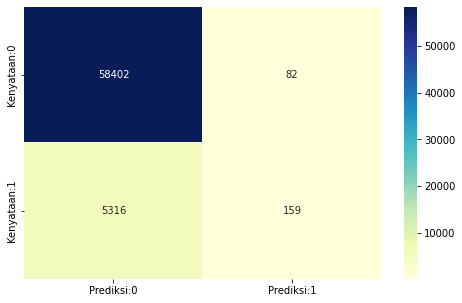

In [ ]:
cm=confusion_matrix(Y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Prediksi:0','Prediksi:1'],index=['Kenyataan:0','Kenyataan:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu");

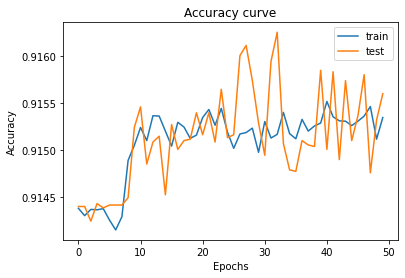

In [ ]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy curve")
plt.legend(['train','test'])
plt.show()

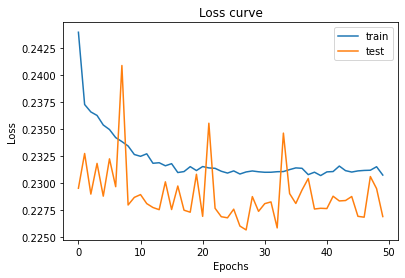

In [ ]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss curve")
plt.legend(['train','test'])
plt.show()